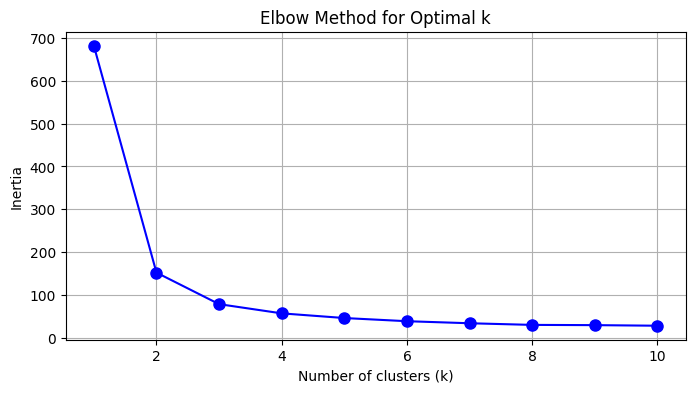

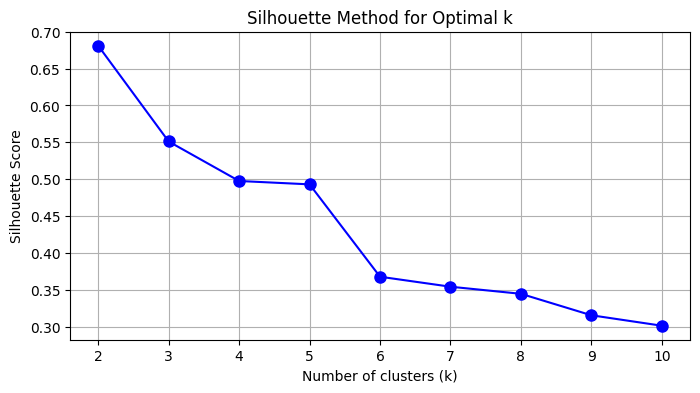

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Варіант 16
#Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.
#Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
#Візуалізувати кластери.
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

first_five_rows = iris_df.head()

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(iris_df)
    silhouette_scores.append(silhouette_score(iris_df, labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-', markersize=8)
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

first_five_rows


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Розмір датасета: (395, 33)

Типи даних:
 school        object
sex           object
age 

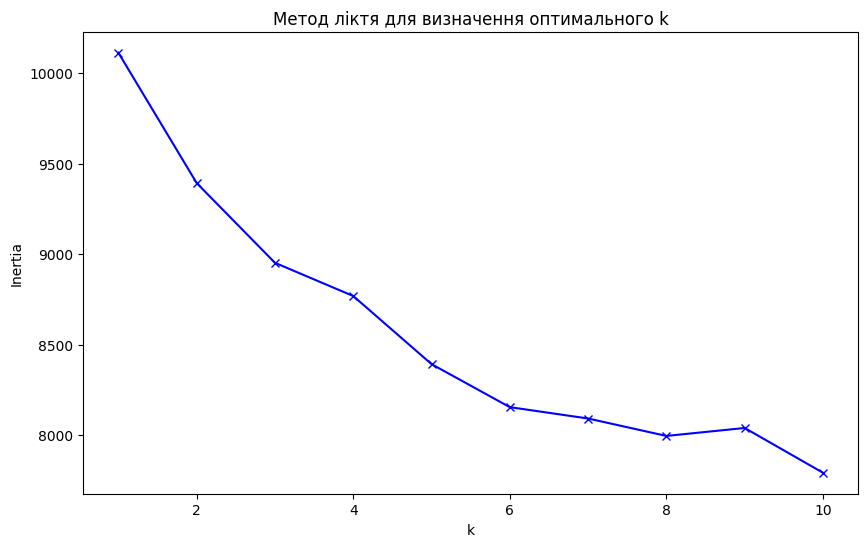

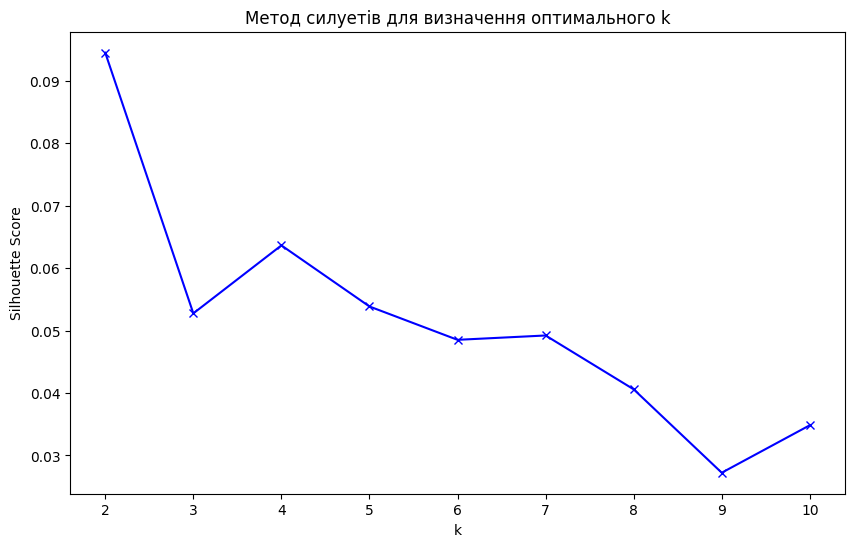

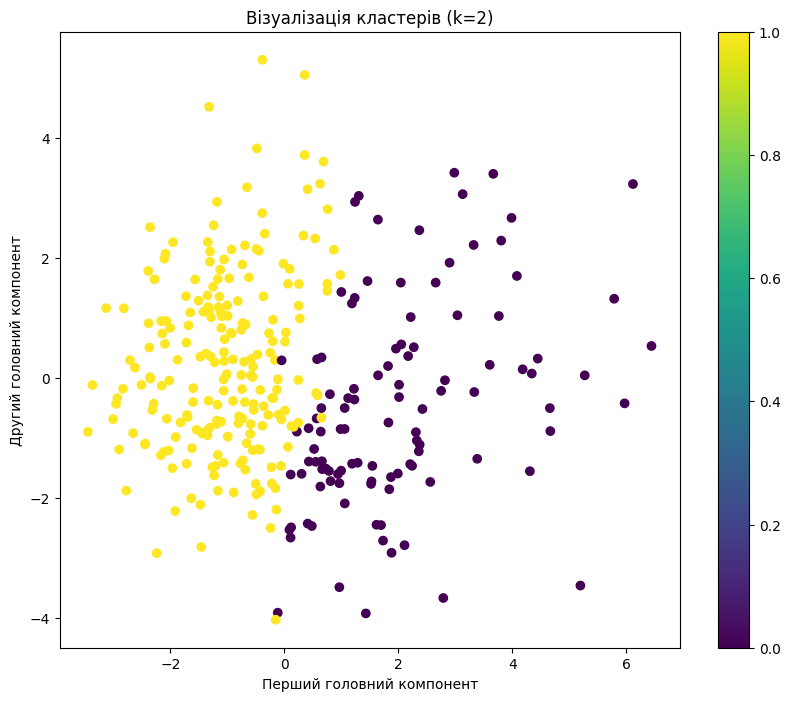


Оптимальна кількість кластерів: 2
Графіки збережено у файлах: elbow_method.png, silhouette_method.png, cluster_visualization.png


In [7]:
#Завантажити датасет Student_data.csv (датасет з Kaggle)
#Реалізувати попередній аналіз даних:
#Роздрукувати перші 5 рядків.
#Вивести розмір датасета, типи даних.
#Перевірити на пропущені значення. При наявності замінити на середнє за
#стовпцем.
#Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
#Визначити, яку задачу розв’язуємо (регресія чи класифікація). Побудувати 3
#моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.
#Оцінити моделі.
#Визначити методом ліктя і силуєтів оптимальну кількість кластерів.
#Візуалізувати кластери.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('Student_data.csv', sep=';')

print(df.head())

print("\nРозмір датасета:", df.shape)
print("\nТипи даних:\n", df.dtypes)

print("\nПропущені значення:\n", df.isnull().sum())

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column].astype(str))

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

duplicates = df_imputed.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")

df_clean = df_imputed.drop_duplicates()

print("\nОписова статистика:\n", df_clean.describe())

X = df_clean.drop('G3', axis=1)
y = df_clean['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

lr = LinearRegression()
lr_mse, lr_r2 = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)

rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
rf_best = rf_grid.best_estimator_
rf_mse, rf_r2 = evaluate_model(rf_best, X_train_scaled, X_test_scaled, y_train, y_test)

svr = SVR()
svr_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svr_grid = GridSearchCV(svr, svr_params, cv=5)
svr_grid.fit(X_train_scaled, y_train)
svr_best = svr_grid.best_estimator_
svr_mse, svr_r2 = evaluate_model(svr_best, X_train_scaled, X_test_scaled, y_train, y_test)

print("\nРезультати моделей:")
print(f"Лінійна регресія - MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")
print(f"Випадковий ліс - MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")
print(f"SVR - MSE: {svr_mse:.4f}, R2: {svr_r2:.4f}")

inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення оптимального k')
plt.show()


silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Метод силуетів для визначення оптимального k')
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Візуалізація кластерів (k={optimal_k})')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.show()

print(f"\nОптимальна кількість кластерів: {optimal_k}")
print("Графіки збережено у файлах: elbow_method.png, silhouette_method.png, cluster_visualization.png")
